# Face Detection

In [ ]:
# pip install tensorflow

In [ ]:
# pip install mtcnn

In [13]:
import mtcnn
# print version
# print(mtcnn.__version__)

Shape of image/array: (720, 1280, 3)


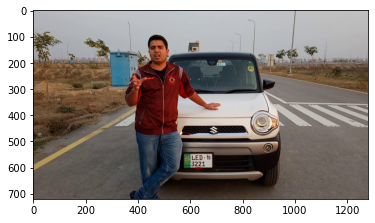

In [50]:
import matplotlib.pyplot as plt
# load image from file
filename = "maxresdefault.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [51]:
def draw_facebox_from_dict(face_dict):
    # extract the face detection result from the dictionary
    result = face_dict
    # get the filename from the dictionary
    filename = result.get('filename')
    if filename is None:
        print("Error: filename not found in dictionary")
        return
    # load the image
#     data = plt.imread(filename)
    data = plt.imread(result['filename'])
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    ax.text(x, y, result['label'], color='red')
    # show the plot
    plt.show()

In [52]:
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)


for i in range (len(faces)):
    new_dict = {'filename': "maxresdefault.jpg", **faces[i]}
    faces[i]=new_dict
    print(faces[i])

# add label key for each face
for i in range(len(faces)):
    faces[i]['label'] = f"Face {i+1}"

# for face in faces:
#     print(face)

print(len(faces))




# CSV FILE

import csv

# Open the CSV file in write mode
with open('faces.csv', mode='w', newline='') as file:
    # Define the header of the CSV file
    fieldnames = ['filename', 'box', 'confidence', 'keypoints', 'label']
    # Create a CSV writer object
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    # Write the header to the CSV file
    writer.writeheader()

    # Write each face to the CSV file
    for i, face in enumerate(faces):
        face['label'] = f"Face {i+1}"
        writer.writerow(face)

print("Faces saved to CSV file successfully.")

1/1 [==============================] - 0s 140ms/step
{'filename': 'maxresdefault.jpg', 'box': [446, 111, 62, 89], 'confidence': 0.9999911785125732, 'keypoints': {'left_eye': (458, 145), 'right_eye': (487, 143), 'nose': (472, 157), 'mouth_left': (463, 176), 'mouth_right': (486, 175)}}
1
Faces saved to CSV file successfully.


{'filename': 'maxresdefault.jpg', 'box': [446, 111, 62, 89], 'confidence': 0.9999911785125732, 'keypoints': {'left_eye': (458, 145), 'right_eye': (487, 143), 'nose': (472, 157), 'mouth_left': (463, 176), 'mouth_right': (486, 175)}, 'label': 'Face 1'}


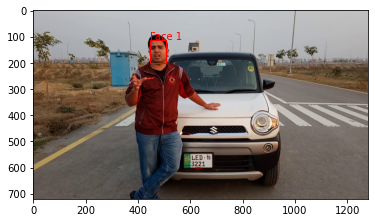

In [53]:
face_di= faces[0]
print(face_di)
draw_facebox_from_dict(face_di)

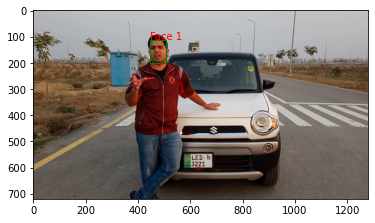

In [54]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    
    
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        ax.text(x, y, result['label'], color='red')
        
        
    # show the plot
    plt.show()
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
#detector = mtcnn.MTCNN()
# detect faces in the image
####faces = detector.detect_faces(pixels)
# display faces on the original image
# draw_facebox(filename, faces)
draw_facebox(filename, faces)

# NUMBER PLATE

In [55]:
# !pip install easyocr
# !pip install imutils

In [79]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

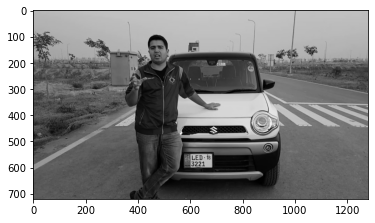

In [130]:
img = cv2.imread('maxresdefault.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

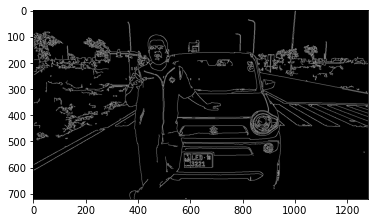

In [131]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [132]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [133]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [134]:
location

array([[[601, 550]],

       [[681, 548]],

       [[684, 598]],

       [[603, 600]]], dtype=int32)

In [135]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

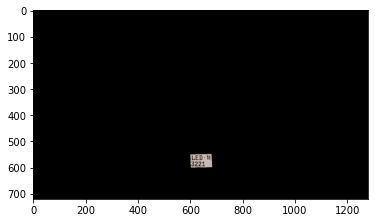

In [136]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [137]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

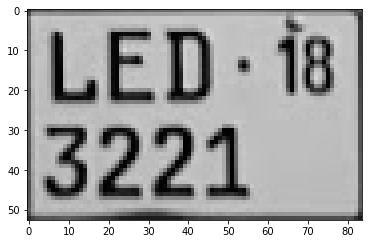

In [138]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [139]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 2], [52, 2], [52, 28], [2, 28]], 'LED', 0.9999569841768202),
 ([[58, 2], [82, 2], [82, 26], [58, 26]], '18', 0.3928461468355272),
 ([[0, 26], [60, 26], [60, 53], [0, 53]], '3221', 0.7428066660277797)]

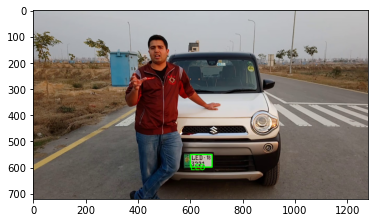

In [140]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

# SINGLE CODE

Shape of image/array: (316, 474, 3)
5/5 [==============================] - 0s 25ms/step
{'filename': 'OIP.jpg', 'box': [167, 171, 30, 41], 'confidence': 1.0, 'keypoints': {'left_eye': (175, 188), 'right_eye': (189, 189), 'nose': (180, 197), 'mouth_left': (174, 201), 'mouth_right': (189, 202)}}
{'filename': 'OIP.jpg', 'box': [320, 112, 37, 48], 'confidence': 0.9999933242797852, 'keypoints': {'left_eye': (334, 129), 'right_eye': (350, 133), 'nose': (341, 141), 'mouth_left': (329, 144), 'mouth_right': (346, 148)}}
{'filename': 'OIP.jpg', 'box': [57, 28, 22, 30], 'confidence': 0.9999818801879883, 'keypoints': {'left_eye': (66, 39), 'right_eye': (76, 39), 'nose': (73, 45), 'mouth_left': (65, 50), 'mouth_right': (76, 50)}}
{'filename': 'OIP.jpg', 'box': [368, 95, 28, 35], 'confidence': 0.9999727010726929, 'keypoints': {'left_eye': (373, 110), 'right_eye': (386, 108), 'nose': (378, 117), 'mouth_left': (375, 123), 'mouth_right': (388, 121)}}
{'filename': 'OIP.jpg', 'box': [244, 18, 23, 32], 'c

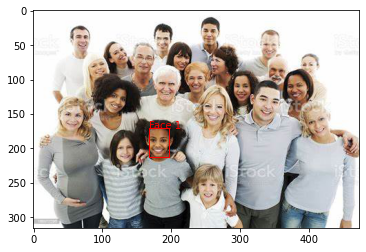

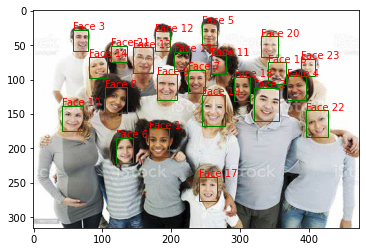

In [127]:
import mtcnn
# print version
# print(mtcnn.__version__)

import matplotlib.pyplot as plt
# load image from file
filename = "OIP.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
# plt.show()

def draw_facebox_from_dict(face_dict):
    # extract the face detection result from the dictionary
    result = face_dict
    # get the filename from the dictionary
    filename = result.get('filename')
    if filename is None:
        print("Error: filename not found in dictionary")
        return
    # load the image
#     data = plt.imread(filename)
    data = plt.imread(result['filename'])
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    ax.text(x, y, result['label'], color='red')
    # show the plot
    plt.show()
    
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)


for i in range (len(faces)):
    new_dict = {'filename': "OIP.jpg", **faces[i]}
    faces[i]=new_dict
    print(faces[i])

# add label key for each face
for i in range(len(faces)):
    faces[i]['label'] = f"Face {i+1}"

# for face in faces:
#     print(face)

print(len(faces))




# CSV FILE

import csv

# Open the CSV file in write mode
with open('faces.csv', mode='w', newline='') as file:
    # Define the header of the CSV file
    fieldnames = ['filename', 'box', 'confidence', 'keypoints', 'label']
    # Create a CSV writer object
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    # Write the header to the CSV file
    writer.writeheader()

    # Write each face to the CSV file
    for i, face in enumerate(faces):
        face['label'] = f"Face {i+1}"
        writer.writerow(face)

print("Faces saved to CSV file successfully.")

face_di= faces[0]
print(face_di)
draw_facebox_from_dict(face_di)

# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    
    
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        ax.text(x, y, result['label'], color='red')
        
        
    # show the plot
    plt.show()
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
#detector = mtcnn.MTCNN()
# detect faces in the image
####faces = detector.detect_faces(pixels)
# display faces on the original image
# draw_facebox(filename, faces)
draw_facebox(filename, faces)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024698084409)]


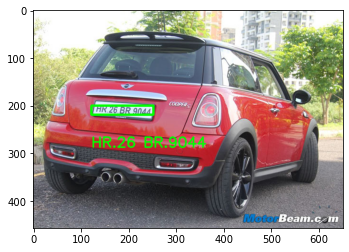

In [129]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        
# print(location)

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

# VIDEO

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


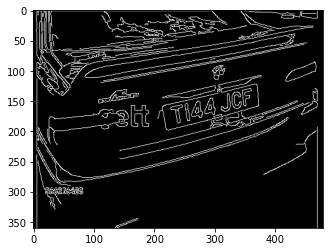

In [123]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

cap = cv2.VideoCapture("Bmw Ac Schnitzer High-Res Stock Video Footage - Getty Images.mp4")

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(frame, frame, mask=mask)

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    print(result)

    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(frame, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

    cv2.imshow('frame', res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [125]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(edged, cmap='gray')

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(frame, frame, mask=mask)

    plt.imshow(new_image)

    (x,y) = np.where(mask==255)
    if len(x) == 0 or len(y) == 0:
        continue
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

    plt.imshow(cropped_image, cmap='gray')

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    if len(result) == 0:
        continue
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    if location is not None:
        res = cv2.putText(frame, text=text, org=(location[0][0][0], location[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
        res = cv2.rectangle(frame, tuple(location[0][0]), tuple(location[2][0]), (0,255,0),3)
        plt.imshow(res)

    cv2.imshow('frame', res)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
